In [55]:
import csv

true_label = []

with open('size_500_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        true_label.append(int(row[0]))


In [56]:
import numpy as np
from scipy.stats import mode

# Assuming you have an array of 500 numbers stored in the variable 'numbers'
def get_accuracy(numbers):
    chunk_size = 100
    num_chunks = len(numbers) // chunk_size

    modes = []

    for i in range(num_chunks):
        chunk = numbers[i * chunk_size: (i + 1) * chunk_size]
        mode_result = mode(chunk)
        mode_value = mode_result.mode[0]
        mode_count = mode_result.count[0]
        modes.append((mode_value, mode_count))

    print(modes)

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data = pd.read_csv('similarity-matrix-k=3.csv')
similarity_matrix = data.drop(columns=['Unnamed: 0']) 
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(similarity_matrix)
kmeans_labels = np.array(kmeans.labels_)
# kmeans_labels

In [58]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=5, random_state=0).fit(similarity_matrix)
gmm_labels = gmm.predict(similarity_matrix)
# gmm_labels

In [59]:
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=5,random_state=0)
spectral_clustering.fit(similarity_matrix)
spectral_labels = spectral_clustering.labels_

/Users/yukewu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:484: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [60]:
get_accuracy(kmeans_labels)
# 2-->0, 0-->1, 3-->2, 1-->3, 4-->4
kmeans_result = []
for i in kmeans_labels:
    if i == 2:
        kmeans_result.append(0)
    elif i == 0:
        kmeans_result.append(1)
    elif i == 3:
        kmeans_result.append(2)
    elif i == 1:
        kmeans_result.append(3)
    else:
        kmeans_result.append(4)

[(2, 88), (0, 80), (3, 36), (1, 36), (4, 41)]


In [61]:
get_accuracy(gmm_labels)
sum(gmm_labels[300:400] == 3)
# 4-->0, 1-->1, 0-->2, 3-->3, 2-->4
gmm_result = []
for i in gmm_labels:
    if i == 4:
        gmm_result.append(0)
    elif i == 1:
        gmm_result.append(1)
    elif i == 0:
        gmm_result.append(2)
    elif i == 3:
        gmm_result.append(3)
    else:
        gmm_result.append(4)

[(4, 88), (1, 67), (0, 39), (2, 39), (2, 46)]


In [62]:
get_accuracy(spectral_labels)
print(sum(gmm_labels[300:400] == 0))
# 2-->0, 1-->1, 3-->2, 0-->3, 4-->4
spectral_result = []
for i in spectral_labels:
    if i == 2:
        spectral_result.append(0)
    elif i == 1:
        spectral_result.append(1)
    elif i == 3:
        spectral_result.append(2)
    elif i == 0:
        spectral_result.append(3)
    else:
        spectral_result.append(4)

[(2, 88), (1, 78), (3, 37), (4, 38), (4, 47)]
25


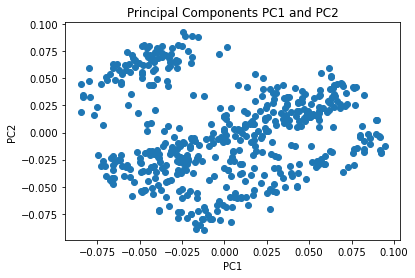

In [63]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a similarity matrix stored in the variable 'similarity_matrix'

# Create an instance of PCA
pca = PCA(n_components=2) 

# Apply PCA on the similarity matrix
principal_components = pca.fit_transform(similarity_matrix)

# Get the PC1 and PC2 values
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]

plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components PC1 and PC2')
plt.show()

In [64]:
column_names = ['true_label', 'pc1', 'pc2', 'gmm_result', 'kmeans_result', 'spectral_result']
rows = zip(true_label, pc1, pc2, gmm_result, kmeans_result, spectral_result)

# Specify the file name
filename = 'bingo3c_result.csv'

# Write the data to the CSV file
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the column names
    writer.writerow(column_names)
    
    # Write the data rows
    writer.writerows(rows)

In [65]:
verify = pd.read_csv('bingo3c_result.csv')
print(sum(verify['true_label'] == verify['kmeans_result'])) #281/500 = 56.2%
print(sum(verify['true_label'] == verify['gmm_result'])) #276/500 = 55.2%
print(sum(verify['true_label'] == verify['spectral_result'])) #278/500 = 55.6%

281
276
278
